In [1]:
import pandas
import torch
from transformers import AutoModel, AutoTokenizer

/Users/achancel/Projects/ramdam/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pandas.read_csv("data_clean.csv")

In [3]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-cased")

In [4]:
tok = [tokenizer.encode(s) for s in data['long_description']]

Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


In [5]:
inv_vocab = {v: k for k, v in tokenizer.vocab.items()}

In [6]:
sentence_id = 330
[inv_vocab[t] for t in tok[sentence_id]]

['[CLS]',
 'Safe',
 '##e',
 'aims',
 'to',
 'provide',
 'a',
 'safety',
 'net',
 'for',
 'your',
 'family',
 'with',
 '360',
 '##°',
 'security',
 '.',
 'With',
 'disc',
 '##ree',
 '##t',
 'ale',
 '##rts',
 ',',
 'real',
 '-',
 'time',
 'tracking',
 ',',
 'and',
 'live',
 'video',
 'streaming',
 'on',
 'demand',
 ',',
 'you',
 'can',
 'always',
 'keep',
 'an',
 'eye',
 'on',
 'your',
 'loved',
 'ones',
 '.',
 'In',
 'case',
 'of',
 'emerge',
 '##ncies',
 ',',
 'Safe',
 '##e',
 "'",
 's',
 'ge',
 '##olo',
 '##cation',
 'feature',
 'allows',
 'for',
 's',
 '##wi',
 '##ft',
 'action',
 '.',
 'It',
 "'",
 's',
 'more',
 'than',
 'an',
 'app',
 ',',
 'it',
 "'",
 's',
 'a',
 'guardia',
 '##n',
 'ang',
 '##el',
 'keeping',
 'watch',
 'over',
 'your',
 'family',
 ',',
 'ens',
 '##uring',
 'their',
 'safety',
 ',',
 'and',
 'providing',
 'you',
 'with',
 'the',
 'necessary',
 'proof',
 'to',
 'ensure',
 'their',
 'protection',
 '.',
 '[SEP]']

122.74285714285715


(array([162., 341.,  50.,  15.,  12.,   5.,   1.,   2.,   3.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([   8.  ,   80.65,  153.3 ,  225.95,  298.6 ,  371.25,  443.9 ,
         516.55,  589.2 ,  661.85,  734.5 ,  807.15,  879.8 ,  952.45,
        1025.1 , 1097.75, 1170.4 , 1243.05, 1315.7 , 1388.35, 1461.  ]),
 <BarContainer object of 20 artists>)

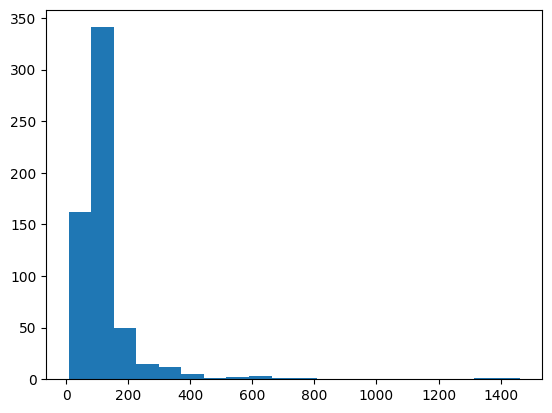

In [7]:
# token number
tok_len = [len(t) for t in tok]
# average number of tokens per description
print(sum(tok_len) / len(tok_len))
import matplotlib.pyplot as plt
plt.hist(tok_len, bins=20)

In [8]:
model = AutoModel.from_pretrained("google-bert/bert-base-multilingual-cased")
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [9]:
encoded_input = tokenizer(data['long_description'][0], return_tensors='pt')
output = model(**encoded_input)
output.last_hidden_state.mean(dim=1) # mean pooling of embeddings on last hidden layer

tensor([[-1.8858e-01,  2.7632e-02,  8.0417e-02, -3.3136e-01,  5.4700e-01,
          1.7350e-01,  1.3898e-01,  5.9724e-02, -2.2447e-01, -6.4898e-01,
         -2.2211e-01,  1.9843e-01,  5.5165e-01,  3.0771e-01,  1.2231e-01,
         -3.5326e-01,  6.7641e-01, -6.7048e-01,  4.0481e-03,  1.5847e-01,
         -2.7329e-01, -1.3481e-01, -3.8077e-01, -2.7998e-01, -1.1754e-01,
         -2.4666e-01, -3.0812e-01, -3.8657e-01, -4.5515e-01, -4.2584e-01,
          2.9146e-01,  5.1446e-01, -3.4934e-01,  5.6106e-01,  1.1160e-01,
          3.3816e-01,  2.8088e-01, -1.9676e-01, -1.4840e-03,  4.5612e-01,
          3.4536e-01,  4.7051e-01,  3.5276e-01, -3.3406e-01,  1.4987e-01,
         -8.9683e-02,  5.0117e-01,  3.2890e-01, -3.4583e-01,  1.6384e-01,
          1.2662e-01, -2.3906e-01,  8.3684e-01,  8.0294e-02,  5.3029e-02,
          1.2925e-01,  7.0008e-02, -2.9379e-01,  2.5225e-01, -2.1916e-01,
          2.8201e-02,  8.8302e-02, -3.6769e-02, -2.2046e-01, -2.9162e-01,
         -6.4649e-01,  2.8229e-01, -6.

In [16]:
tokenizer("le chat", return_tensors='pt') 

{'input_ids': tensor([[  101, 10141, 69338,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [17]:
def embed(text: str):
    tokens = tokenizer(text, return_tensors='pt', truncation=True)
    if len(tokens) > 512:
        tokens = tokens[:512]
    output = model(**tokens)
    return output.last_hidden_state.mean(dim=1).tolist()[0]

In [18]:
embeddings = [embed(s) for s in data['long_description']]

In [19]:
pandas.DataFrame(embeddings).to_csv("embed_bert_long.csv")